# 🚗 Used Cars Analysis - Identifying Modifications That Increase Resale Value


## Project Overview

### Context
This project was developed as part of a final exam in a data science course. The dataset was provided by the instructors and is presumed to be synthetic, created specifically for educational purposes. It includes various attributes of used cars such as pricing, technical specifications, and special modifications.

### 🎯 Goal
The main objective is to identify the key factors that influence the resale price of a used car and assess the impact of specific modifications (F1, F2, F3, F4) to inform strategic decisions before resale.

### 📋 Project Workflow
The analysis includes the following steps:

- Exploratory data analysis and preprocessing  
- Statistical summaries and visualizations  
- Predictive modeling (simple and multiple linear regression)  
- Model evaluation and business-oriented interpretation  

The insights aim to guide whether certain modifications can enhance resale value.

## Import basic packages and load data

In [ ]:
# Data manipulation and structural tools
import pandas as pd
import numpy as np

# Scikit learn packages basics
import sklearn

# Plotting tools
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preset plotting parameters for standardized plotting outputs
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick',labelsize = 12)

In [2]:
# Load data
import pandas as pd

# Define the file path for the CSV file
file_path = 'used_car_dataset.csv'

# Load the CSV file into a DataFrame specifying the separator
df_original = pd.read_csv(file_path, sep=";")

In [3]:
# Preview the data
df_original.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


## 1. Explore dataset

In [4]:
# check data type and missing data
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [6]:
# Describe the statistics of the numerical variables
df_original.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


Observation: On average, cars are priced around \$14,262, manufactured in 2009, and have odometer readings of approximately 112,043 miles. 

### 1.1. Dataset Overview
Size: 9,997 entries across 14 columns.

Variable Types:
- Numerical: price, year, odometer, F1, F2, F3 — suitable for statistical analysis.
- Categorical: manufacturer, condition, fuel, transmission, type, paint_color, F4 — will require encoding for modeling.

### 1.2. Data Quality
Missing Data:
Only the odometer column has missing values (666 entries missing out of 9,997).

### 1.3. Feature Considerations
- Year:
Though stored as float, year represents a manufacturing year and will be converted to integer or used to derive vehicle age.

- Special Modifications (F1–F4):
These will be analyzed to evaluate their effect on price.


In [ ]:
# Convert 'year' column to datetime format
df_original['year'] = pd.to_datetime(df_original['year'], format='%Y')
# Extract the year from the datetime object
df_original['year'] = df_original['year'].dt.year
# Check the data types and missing values again
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   int32  
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 1.0+ MB



- ***Datetime or Integer Conversion:*** While converting directly to int works, using a two-step conversion (float64 → datetime64 → int64) ensures data consistency and is useful if the 'year' column contains inconsistencies, such as string values, decimal numbers (e.g., 2010.0), or improper formatting.

- ***'Year' column - int32 dtype:*** The 'year' column is stored as int32, which is memory-efficient since vehicle years (e.g., 1900–2020) easily fit within this range. Pandas automatically assigns int32 instead of int64 to optimize memory usage.


In [5]:
# Clearer look on missing values
df_original.isnull().sum()

price             0
year              0
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer        666
transmission      0
type              0
paint_color       0
F1                0
F2                0
F3                0
F4                0
dtype: int64

The column 'odometer' is the only one containing missing values, with exactly 666 null entries.

These will need to be addressed before modeling, either through imputation or row removal.

## 2. Understanding the Variables
### 2.1. Categorical columns vs Numerical columns

In [38]:
# get the categorical data
cat_cols = df_original.select_dtypes(include=['object', 'category'])

# get numeric cols
num_cols = df_original.select_dtypes(include=['float64', 'int64', 'int32'])

print('Categorical columns:', cat_cols.columns, '\n')
print('Numerical columns:', num_cols)


Categorical columns: Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission',
       'type', 'paint_color', 'F4'],
      dtype='object') 

Numerical columns:         price  year  odometer    F1        F2        F3
0     18219.0  2008   86238.0  5823  2.193844 -0.031986
1       800.0  2008  170953.0  2024  2.133691  0.097985
2     23660.0  2016  119026.0   294  2.160859  0.046984
3      5335.0  2009   69000.0  3544  2.114929 -0.110121
4      1597.0  1999   59130.0  1329  1.829625 -0.060615
...       ...   ...       ...   ...       ...       ...
9992  18924.0  2017  122612.0  3588  2.202934  0.212334
9993   4248.0  2002       NaN   157  2.147843  0.070923
9994  26269.0  2017   52541.0  1499  2.392569  0.094751
9995   6149.0  2013  197000.0   180  2.269796  0.129762
9996   9831.0  2015  139000.0   386  2.407066  0.311618

[9997 rows x 6 columns]


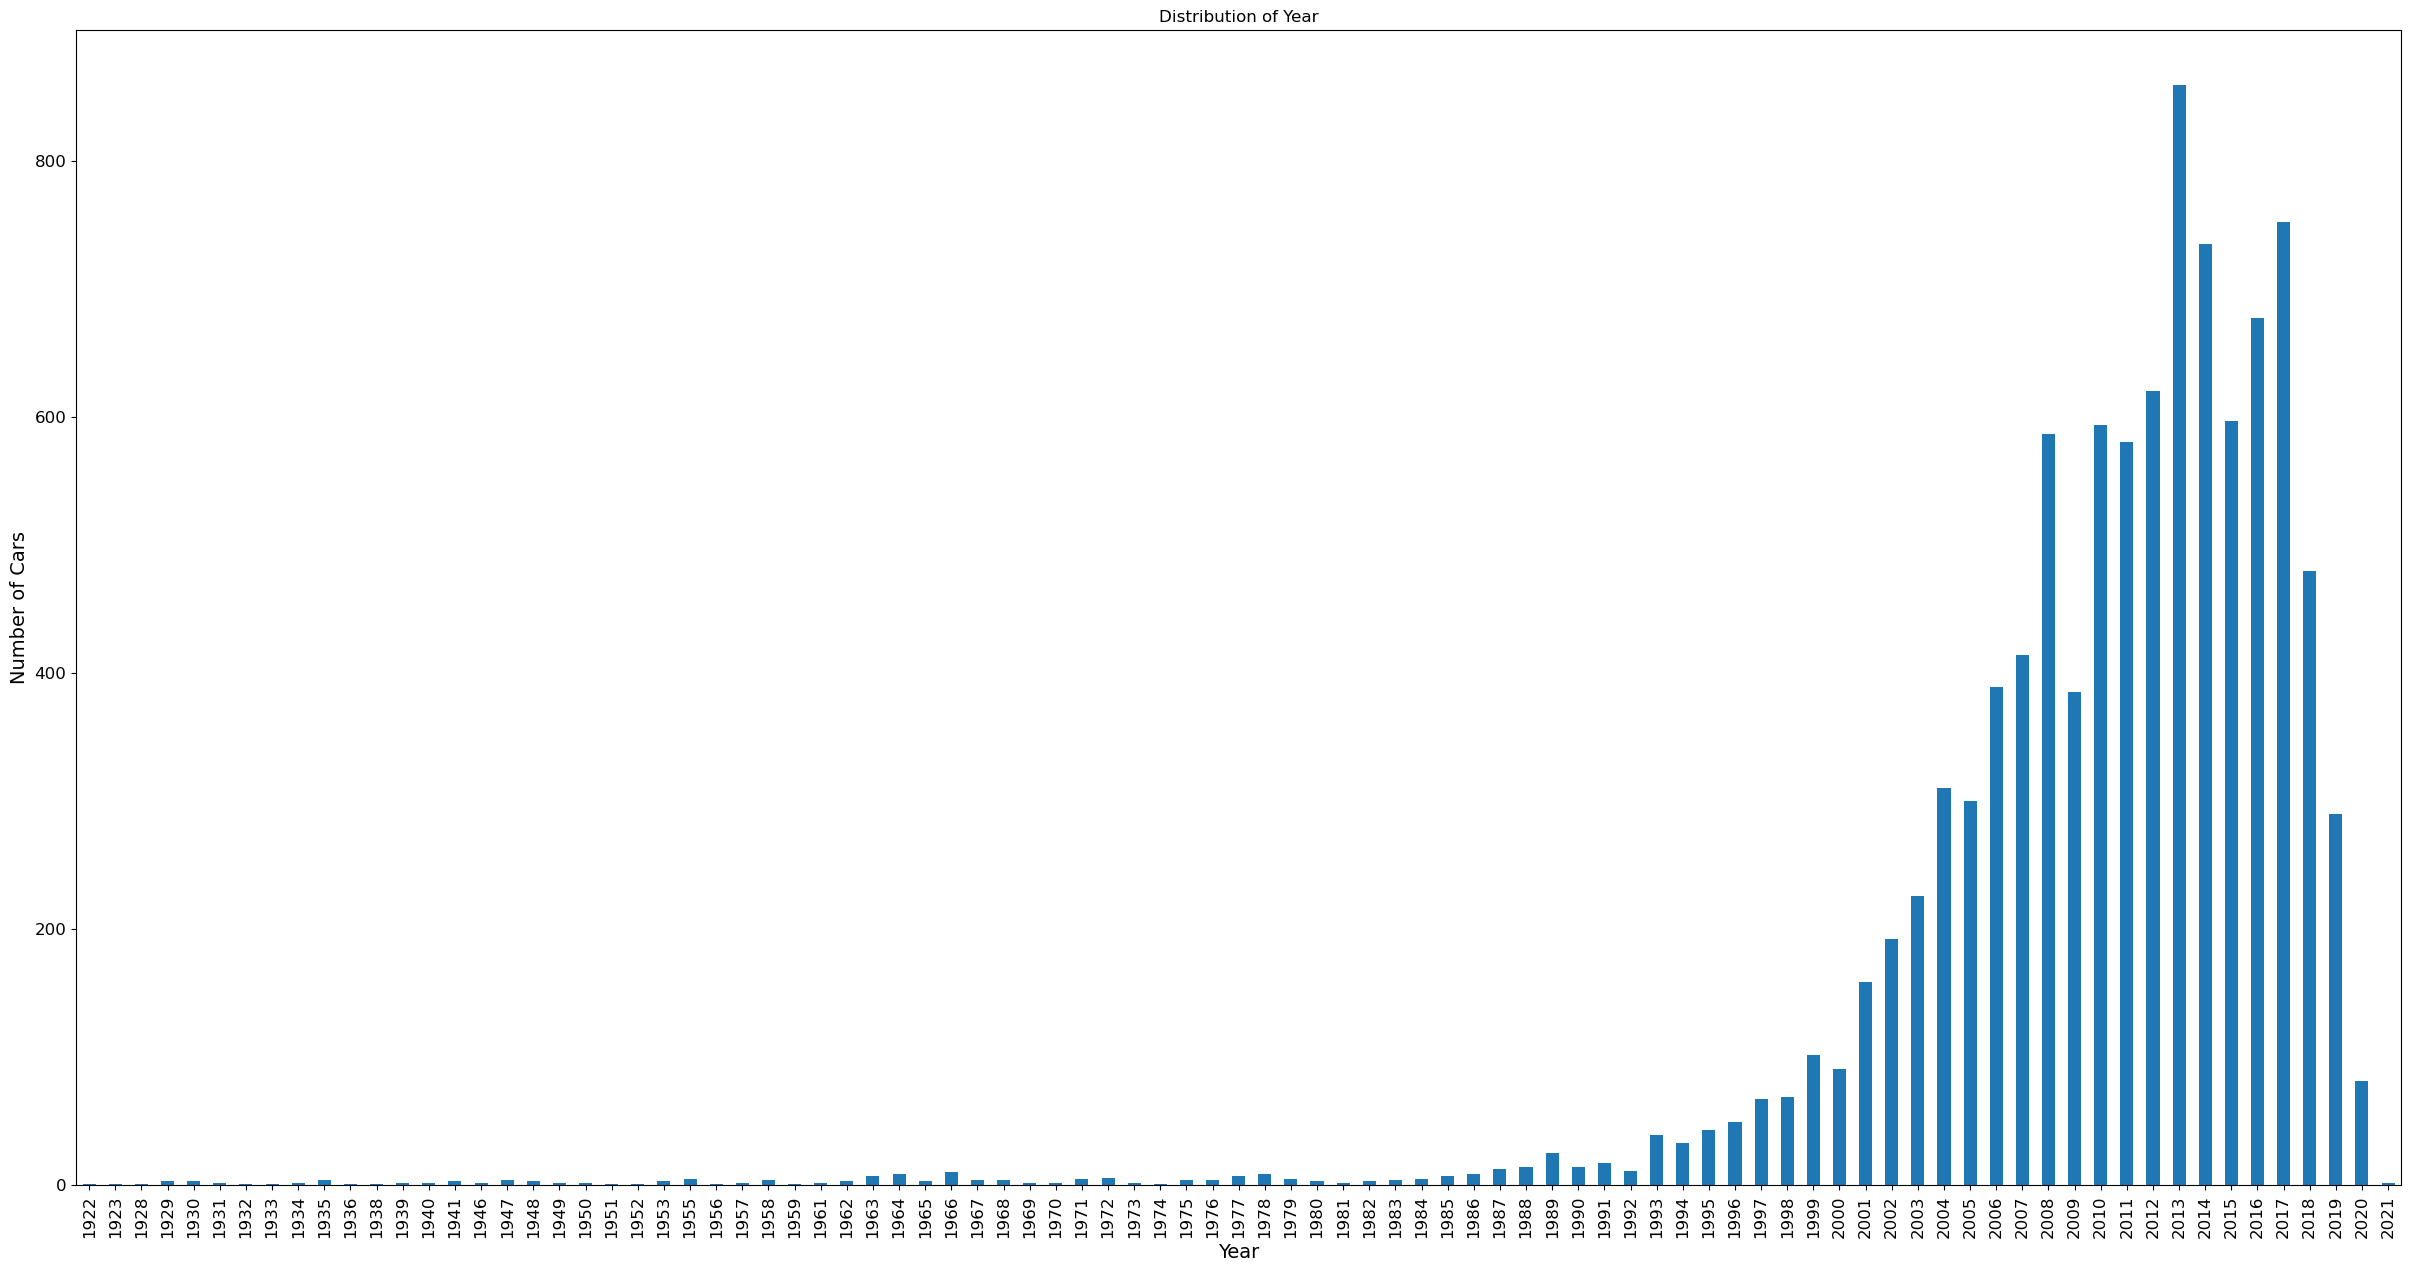

In [33]:
# Plotting the distribution of the 'year' column
import matplotlib.pyplot as plt

df_original['year'].value_counts().sort_index().plot(kind='bar', figsize=(30, 15))
# 'value_counts()' gives the frequency of each unique year
# 'sort_index()' sorts the years in ascending order
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

The bar plot above illustrates the distribution of used cars by manufacturing year. Most vehicles are relatively recent, primarily ranging from 1993 to 2020. This suggests that the dataset focuses on newer models, which likely influences pricing trends.

The clear numerical progression supports keeping the 'year' column as a continuous variable rather than converting it into categorical bins, further emphasizing its importance as a key feature in price analysis.

### 2.2. Unique values in categorical columns

In [32]:
# Check the unique values in the categorical columns
for col in cat_cols.columns:
    print(f"Unique values in {col}: {cat_cols[col].unique()}\n")

Unique values in manufacturer: ['ford' 'subaru']

Unique values in condition: ['excellent' 'good' 'like new' 'fair']

Unique values in cylinders: ['8 cylinders' '6 cylinders' '4 cylinders']

Unique values in fuel: ['gas']

Unique values in transmission: ['automatic' 'manual']

Unique values in type: ['pickup' 'SUV' 'truck' 'sedan']

Unique values in paint_color: ['black' 'red' 'white' 'blue' 'silver']

Unique values in F4: ['b' 'c' 'a']



### 2.3. Variable Explanation
Based on the exploration and analysis of the unique values in the categorical columns, we can better understand the variables in this dataset. The following table summarizes their descriptions:

| **Variable**   | **Description**                                                                 |
|----------------|---------------------------------------------------------------------------------|
| **price**      | The selling price of the used car (in dollars).                                |
| **year**       | The year the car was manufactured.                                              |
| **manufacturer** | The car's brand or maker (e.g., Ford, Subaru).                                |
| **condition**  | The car's condition, indicating how new or used it is (e.g., excellent, good, like new, fair).   |
| **cylinders**  | The number of cylinders in the engine. Generally, more cylinders mean more power.    |
| **fuel**       | The type of fuel the car uses (e.g., gas). In this dataset, all entries are 'gas'.    |
| **odometer**   | The total distance the car has been driven, in miles.                              |
| **transmission** | The type of gearbox — automatic (shifts gears for you) or manual (you shift gears).  |
| **type**       | The body style of the car (e.g., pickup, SUV, truck, sedan).                        |
| **paint_color** | The exterior color of the car.                                                  |
| **F1**         | A numeric feature representing a **special modification** — no label provided.|
| **F2**         | Another numeric feature representing a **special modification** — purpose unknown.   |
| **F3**         | A third numeric feature for a special modification — also unclear without further documentation.  |
| **F4**         | A categorical feature representing a special modification (e.g., 'a', 'b', 'c') — potentially a package or label. |

## 3. Exploratory Data Analysis
### 3.1. Distribution of Numerical Features

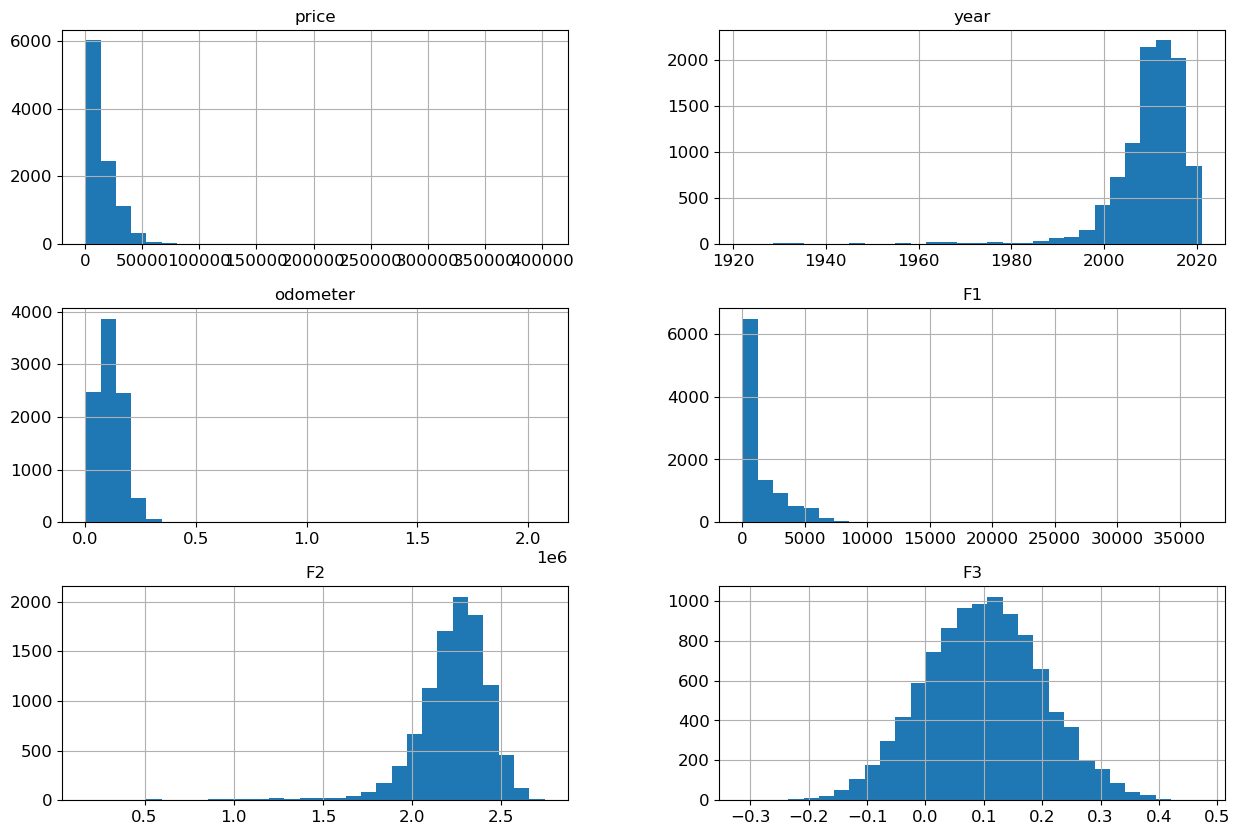

In [9]:
# Plot histogram to see numeric column distribution
num_cols.hist(bins=30, figsize=(15, 10))
plt.show()


**Observations:**
- Right skewness in: odometer, price, F1
- Left skewness in: year, F2
- F3 appears to exhibit a fairly symmetrical distribution: the data is evenly spread out from the center, with equal amounts on both sides of the mean.

### 3.2. Price by Year (Boxplot Analysis)

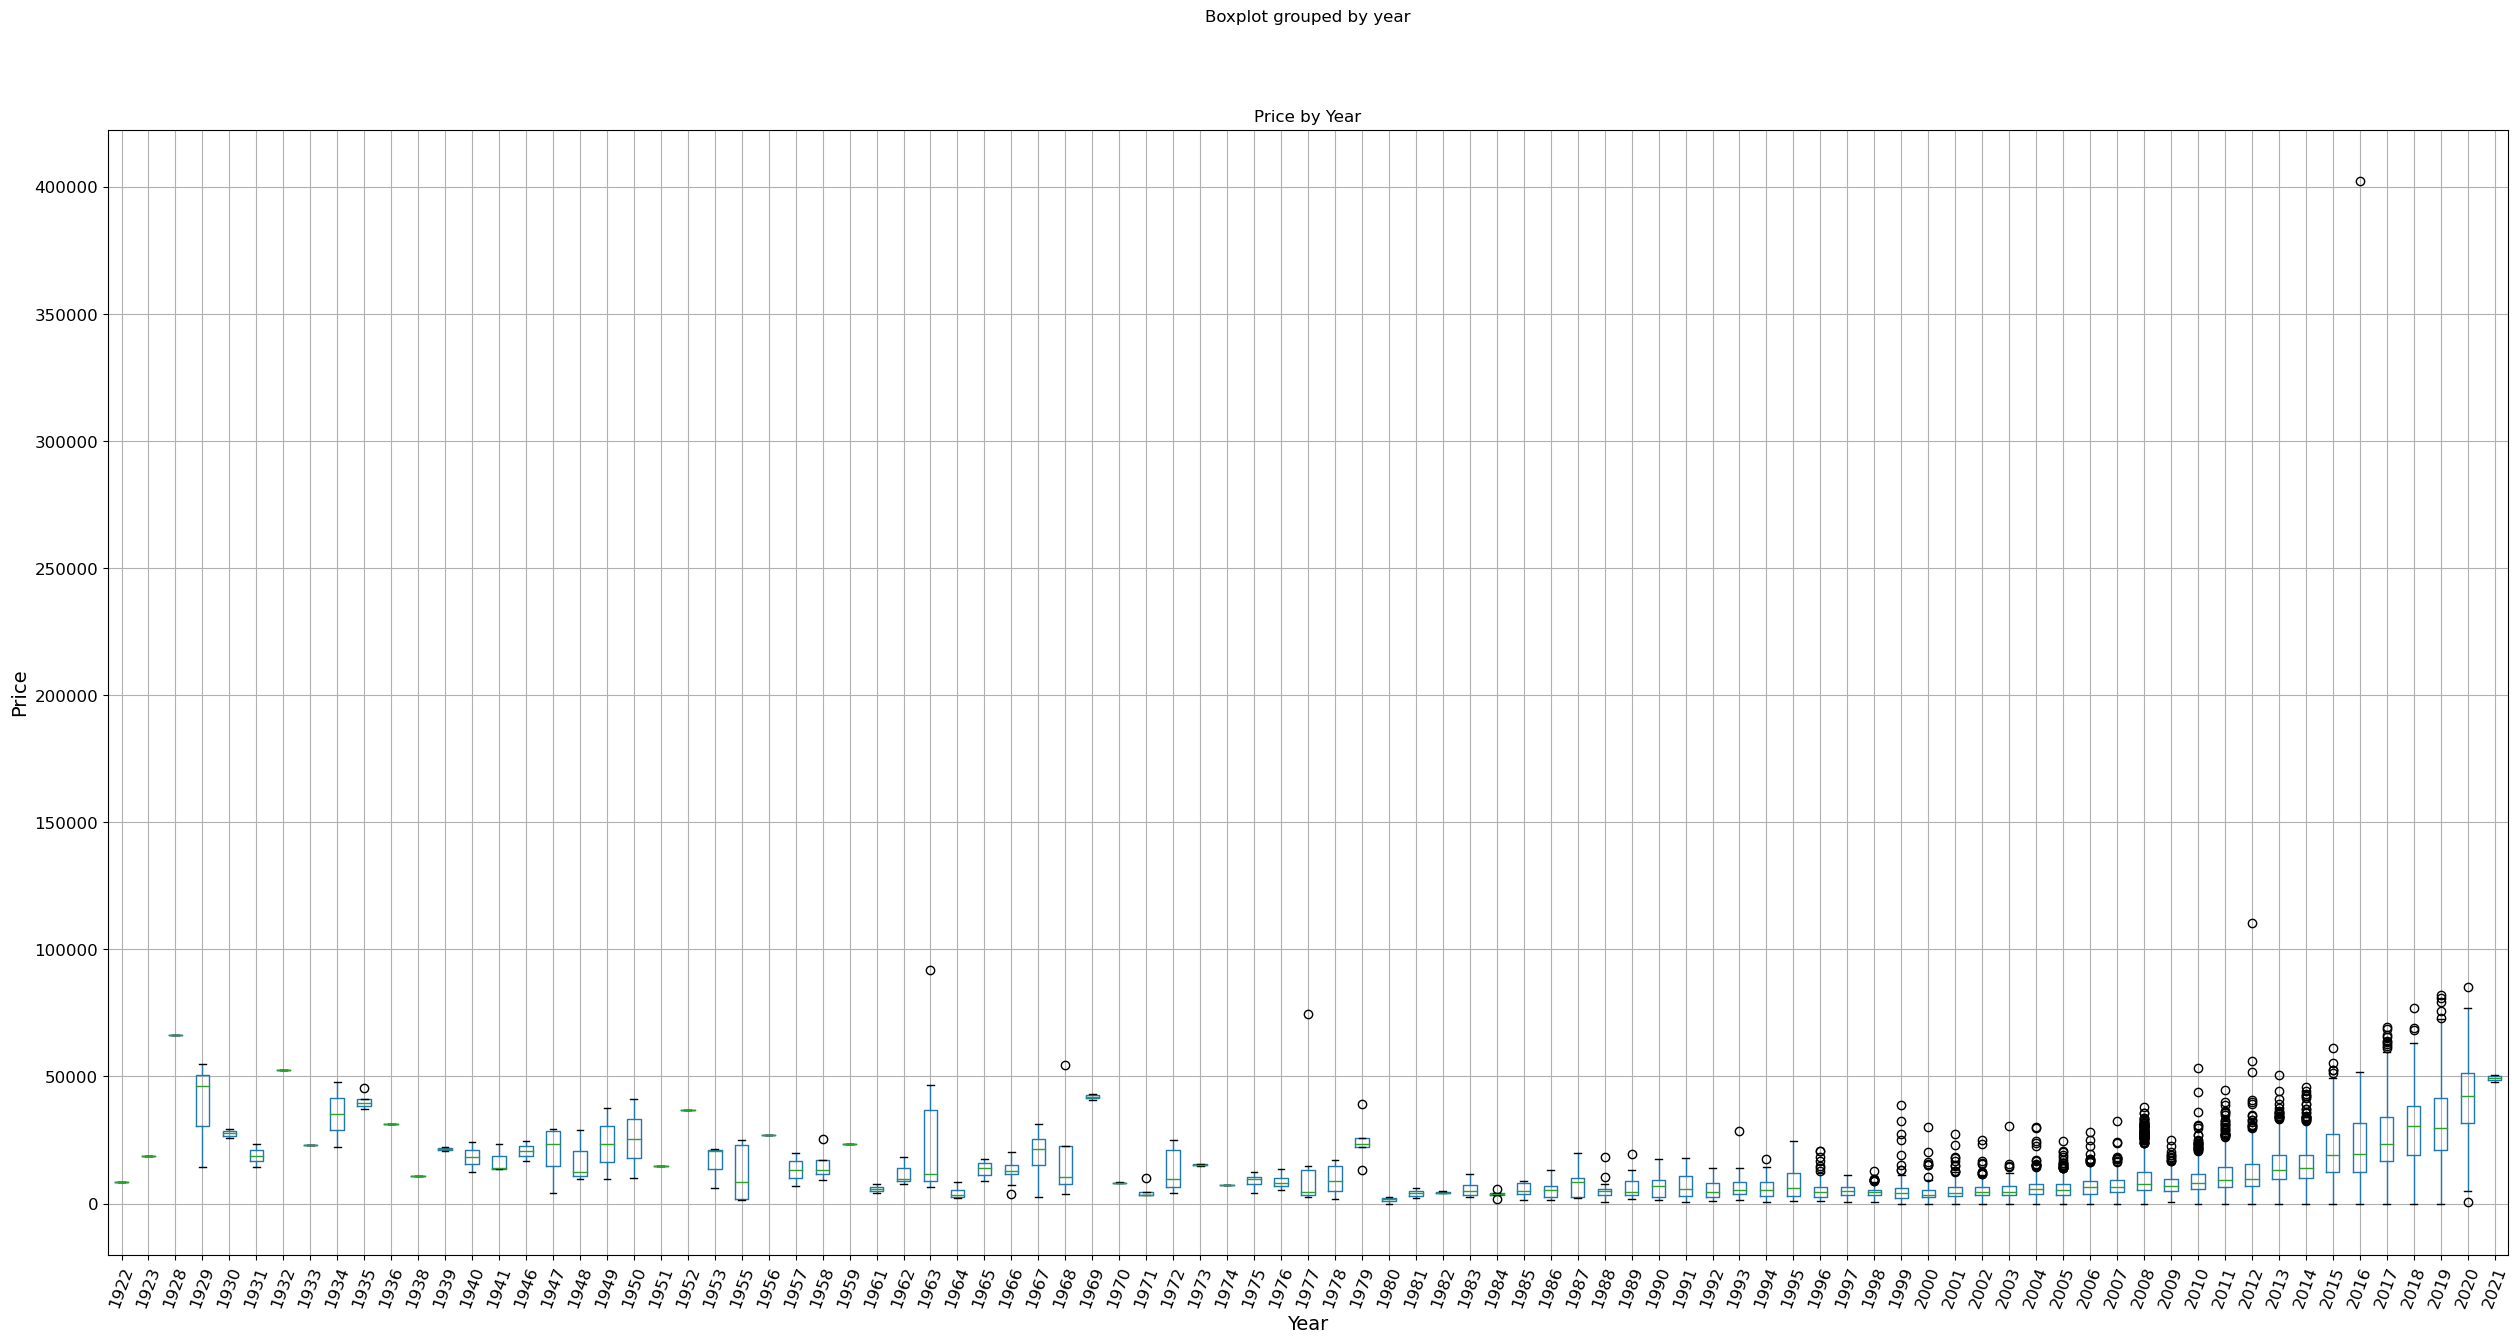

In [31]:
# Boxplot to see the distribution of 'price' by 'year'
df_original.boxplot(column='price', by='year', figsize=(30, 15))

# Set the title and axis labels
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=70)

# Display the plot
plt.show()


The boxplot above displays the distribution of car prices across manufacturing years. We observe a general decline in median price as the cars get older, with more recent models (closer to 2020) tending to have higher prices and less variability. Conversely, older cars show lower median prices and wider spreads, indicating more variability in valuation, possibly due to condition or mileage differences.

This visualization supports the negative correlation between age and price, highlighting 'year' as a strong predictor in price modeling.



### 3.3. Correlation Heatmap (Before Data Cleaning)

To visualize the linear relationships between numerical variables, we compute the Pearson correlation matrix and visualize it using a heatmap.

Only numeric columns are included, so we first extract their names as a list from the previously defined `num_cols`, which was a Series of column names. We then apply `.corr()` to compute the correlations.

This heatmap helps identify multicollinearity and strong predictive relationships between features.


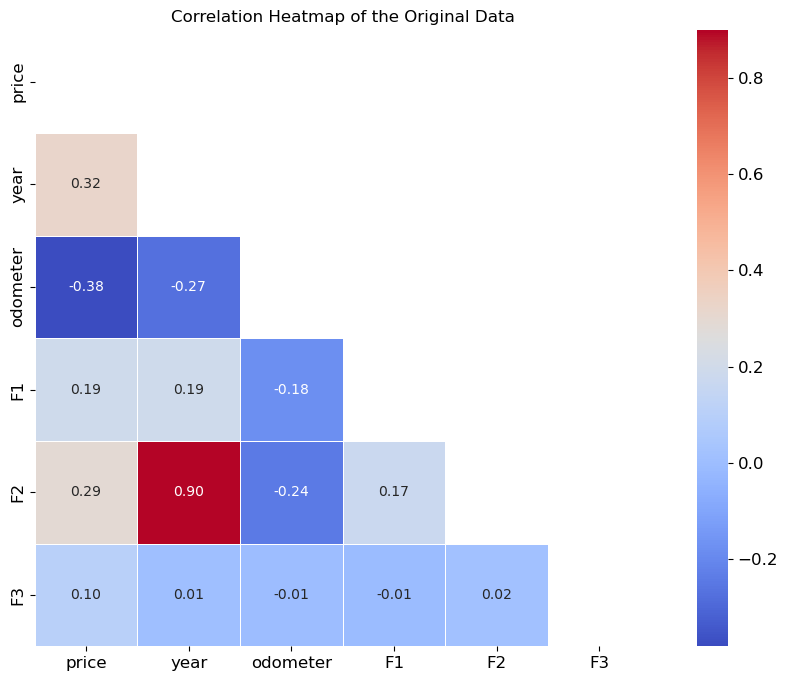

In [ ]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))
# Select only the numerical columns for correlation
num_cols_list = num_cols.columns.tolist() # Get the list of numerical columns 
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(num_cols_list, dtype=bool))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_original[num_cols_list].corr(), mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=.5)
# Add title
plt.title('Correlation Heatmap of the Original Data')
# Show the plot
plt.show()



Note:
This heatmap was generated prior to missing value imputation and train-test split, as part of the EDA phase.
Its purpose is to uncover linear relationships between numerical features in their raw state, spot early signs of multicollinearity, and highlight associations with the target variable (`price`).

📌 Key Insights
- `odometer` shows a moderate negative correlation with `price` (-0.38): cars with higher mileage typically sell for less.
- `year` is moderately positively correlated (0.32): newer cars are generally more expensive.
- `F2` is highly correlated with `year` (0.90) and moderately with `price` (0.29), suggesting it may capture recency-related modifications.
- `F1` (0.19) and `F3` (0.10) show weaker links to `price`.

These early signals guide feature selection but must be interpreted cautiously — the data is still uncleaned, and potential outliers or missing values may distort these relationships.

⚠️ Caution: The strong correlation between `F2` and `year` may introduce multicollinearity in linear models. Further checks (e.g., VIF) are needed to decide whether to drop, combine, or regularize these features.

💡 Reminder: Correlation ≠ causation. These metrics highlight associations, not influence. Modeling will provide deeper insights.

## 4. Data Cleaning
### Missing values handling
The column 'odometer' is the only one that contains missing values and it is showing a right-skewed distribution.
In this case, median imputation is often preferred as it is less sensitive to outliers and would not affect the skewness of the data significantly.

In [10]:
# Perform median imputation for the 'odometer' column
# Create a copy of data frame
df = df_original.copy()
# Handling missing values with different methods
df['odometer'].fillna(df['odometer'].median(), inplace=True)

# Check for the missing values again
df.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
F1              0
F2              0
F3              0
F4              0
dtype: int64

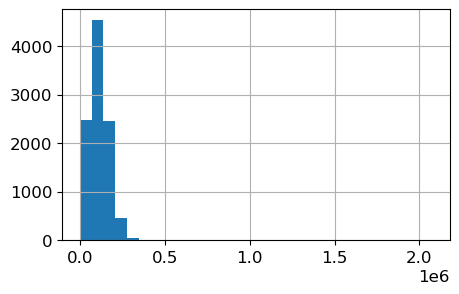

In [11]:
# Plot histogram again to see distribution of the 'odometer' column
df['odometer'].hist(bins = 30,figsize = (5,3))
plt.show()

After performing median imputation for the 'odometer' column, the distribution's shape appears to have remained largely consistent. However, there is a slight increase in the peak of the distribution, and the median closely approximates the mode.

List of categorical columns to plot:      manufacturer  condition    cylinders fuel transmission    type  \
0            ford  excellent  8 cylinders  gas    automatic  pickup   
1            ford  excellent  6 cylinders  gas    automatic     SUV   
2            ford       good  8 cylinders  gas    automatic   truck   
3            ford  excellent  4 cylinders  gas       manual   sedan   
4            ford       good  6 cylinders  gas    automatic   sedan   
...           ...        ...          ...  ...          ...     ...   
9992         ford       good  4 cylinders  gas    automatic   sedan   
9993         ford   like new  6 cylinders  gas    automatic   sedan   
9994         ford  excellent  6 cylinders  gas    automatic     SUV   
9995         ford       good  4 cylinders  gas    automatic     SUV   
9996         ford  excellent  4 cylinders  gas    automatic     SUV   

     paint_color F4  
0          black  b  
1            red  b  
2          white  c  
3           blue  c  


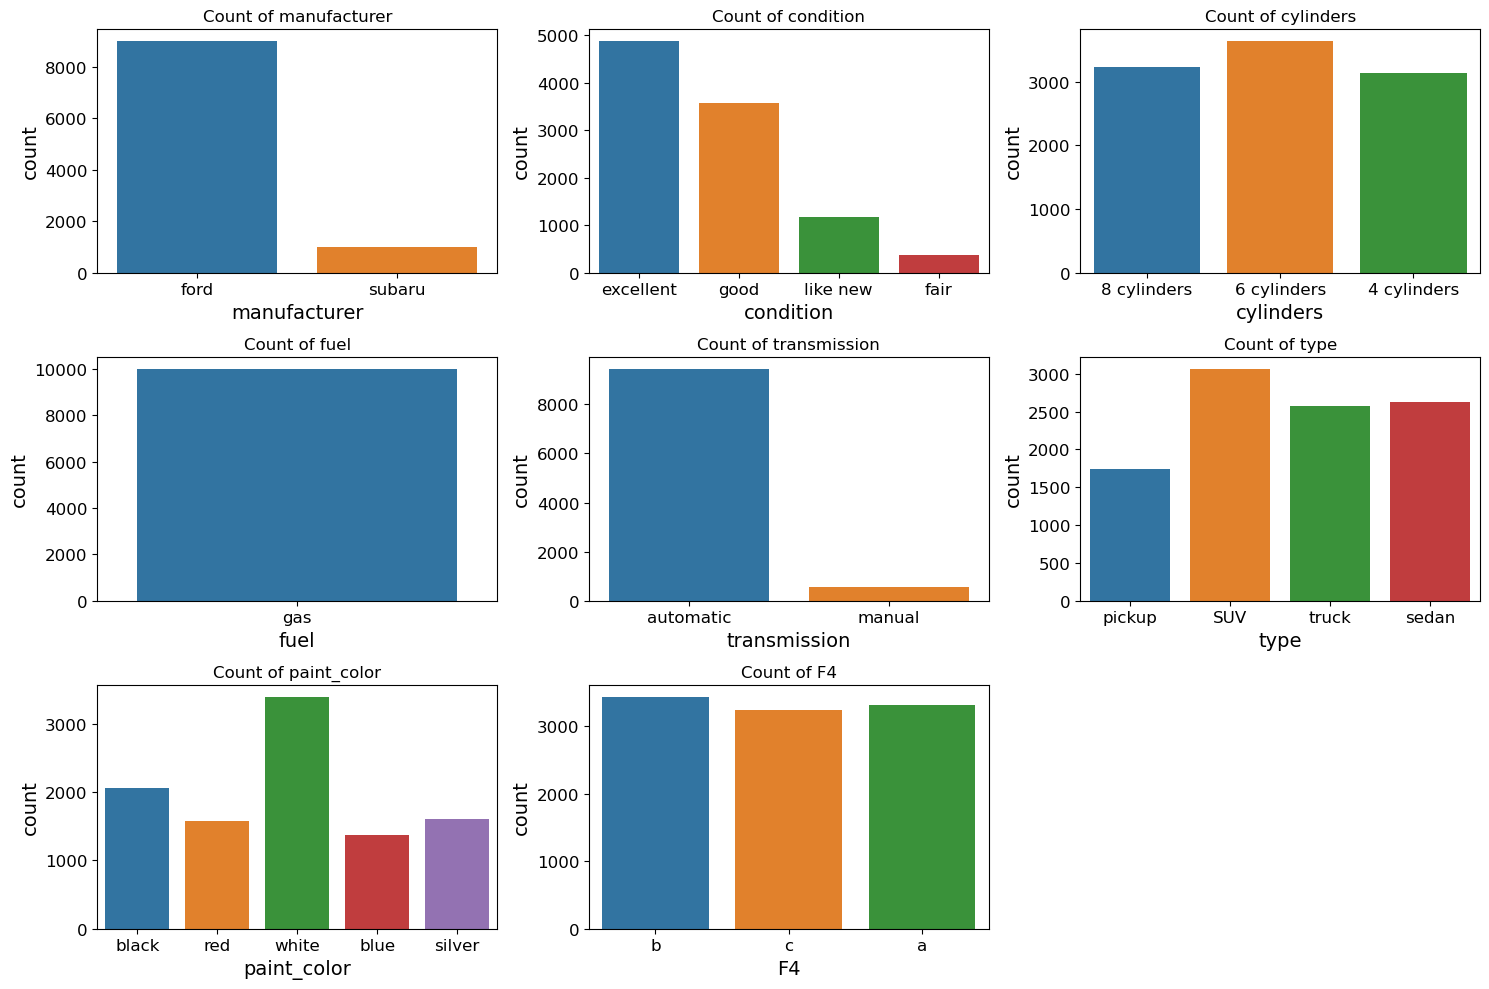

In [12]:
# Categorical variables

import seaborn as sns

# List of categorical columns to plot
print('List of categorical columns to plot:',cat_cols)

# Create a figure to hold the subplots
plt.figure(figsize=(15, 10))

# Loop through the categorical columns and create a subplot for each
for index, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, index)  # Adjust the grid size according to the number of categorical columns
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column}')

plt.tight_layout()
plt.show()


In the 'manufacturer' column, Ford cars dominate the dataset, followed by Subaru. Automatic transmissions are more prevalent than manual transmissions. All cars in the dataset use gas as their fuel type. Most cars are in excellent or good condition, with fewer in fair condition. White cars slightly outnumber cars of other colors.

## 4. Exploratory Data Analysis (EDA)

### Single variable histograms and scatterplot pairplots

/Users/elodiechen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


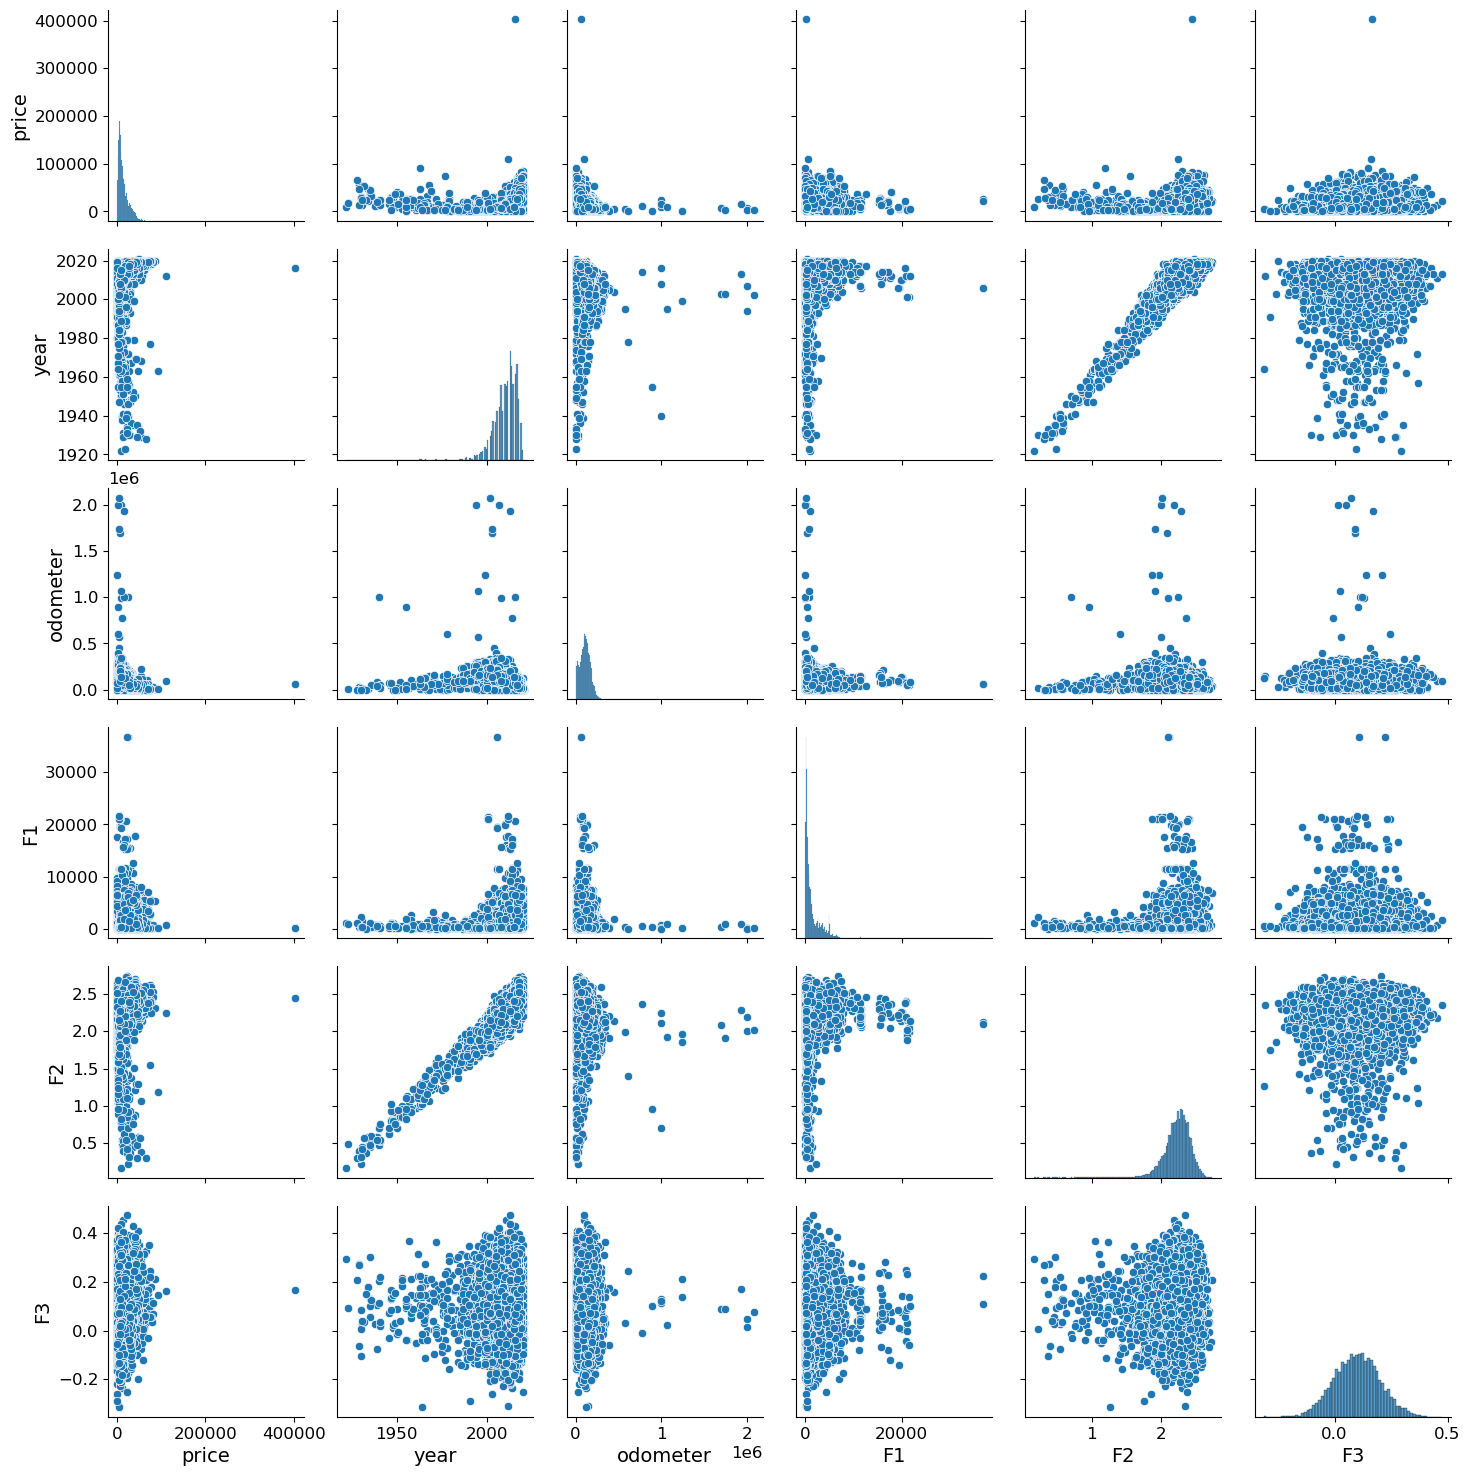

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot with numerical data
sns.pairplot(num_cols)

# Show the plot
plt.show()


This pair plot shows the relationships between pairs of numerical variables in a dataset.

- Year and F2: Clear positive linear relationship, suggesting newer vehicles have higher F2 values.
- Other pairs: No discernible pattern, indicating no linear relationship.


In [14]:
import statsmodels.api as sm
import pandas as pd

# Add a constant term to the DataFrame for the intercept
df_with_const = sm.add_constant(df)

# Fit a linear regression model
model = sm.OLS(df_with_const['price'], df_with_const[['const', 'year']])
results = model.fit()

# Interpret the coefficients
print(results.summary())

# Calculate the decrease in price per year
price_decrease_per_year = results.params['year']

# Print the interpretation
print("The price decreases by $", round(price_decrease_per_year, 2), "per year.")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1167.
Date:                Thu, 01 May 2025   Prob (F-statistic):          4.82e-242
Time:                        15:50:06   Log-Likelihood:            -1.0796e+05
No. Observations:                9997   AIC:                         2.159e+05
Df Residuals:                    9995   BIC:                         2.159e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.039e+05   2.69e+04    -33.633      0.0

The regression analysis indicates that with each year increase in the age of the car, the price decreases by $456.85, assuming all other factors remain constant. The model accounts for approximately 10.5% of the variability in car prices. However, it's important to note that this relationship is not constant across all age groups.

In [15]:
# Create a categorical variable for age groups
df['age_group'] = pd.cut(df['year'], bins=[1930, 2015, 2020], labels=['<5 years', '>=5 years'])

# Add a constant term to the DataFrame for the intercept
df_with_const = sm.add_constant(df)

# Fit a linear regression model with interaction terms
model = sm.OLS.from_formula('price ~ year + age_group + year:age_group', data=df_with_const)
results = model.fit()

# Interpret the coefficients
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1490.
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        15:50:06   Log-Likelihood:            -1.0652e+05
No. Observations:                9986   AIC:                         2.130e+05
Df Residuals:                    9982   BIC:                         2.131e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The regression analysis suggests that the age of the car significantly affects its price. The model indicates that for cars younger than 5 years (i.e., the category '<5 years'), the price decreases by approximately \$6,827,000, while for cars older than or equal to 5 years, the price decreases by \$174.89 per year. Additionally, the interaction term between 'year' and 'age_group[>=5 years]' indicates that the value of cars that are older than or equal to 5 years decreases faster by approximately $3,391 per year compared to cars younger than 5 years.

Overall, the model explains about 30.9% of the variability in car prices.

### Correlation heatmap

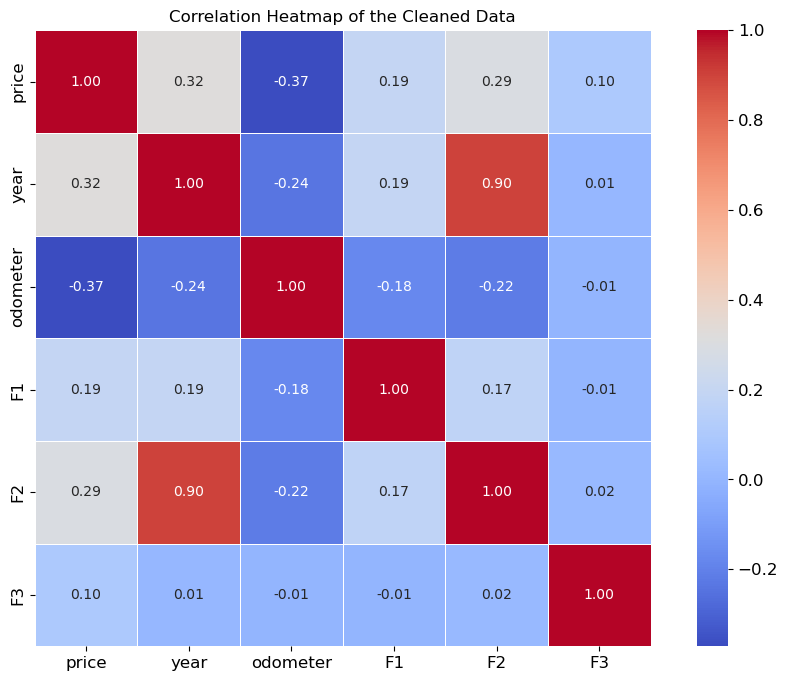

In [16]:
# Correlation heatmap
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title('Correlation Heatmap of the Cleaned Data')

# Show the plot
plt.show()

The correlation matrix heatmap confirms the previous analysis: Year and F2 exhibit a very high positive correlation score of 0.90. Additionally, there is a moderate negative correlation score of -0.37 between odometer and price. Moreover, we observe moderate positive correlations between year and price (0.32) and between F2 and price (0.29).

These correlation values suggest that the variables most relevant to consider when studying the impact of features on car prices are the year and F2 variables.

However, before proceeding further, it's advisable to check for collinearity among the variables.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric columns excluding the target variable 'price'
vif_num_cols = num_cols.columns.drop("price")

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[vif_num_cols].values, i) for i in range(df[vif_num_cols].shape[1])]
vif["features"] = vif_num_cols
vif.sort_values(by='VIF Factor', ascending=False, inplace=True)

# Inspect the VIFs for each feature
print(vif.round(2))


   VIF Factor  features
0      120.07      year
3      112.31        F2
1        3.28  odometer
4        1.97        F3
2        1.61        F1


VIF values greater than 10 typically indicate high multicollinearity, suggesting that the feature may be highly correlated with other features in the dataset.

**Interpretation:**
The 'year' feature has a VIF of 120.07, indicating high multicollinearity. It suggests that the 'year' feature is highly correlated with other features in the dataset.

'F2' also has a VIF of 112.31, indicating high multicollinearity.

For 'odometer', 'F3', and 'F1', VIF values are respectively 3.28, 1.97, and 1.61, which suggests low multicollinearity. Generally, VIF values below 5 indicate that multicollinearity is not severe and the variables can be used in the model without concerns of highly inflated variances due to multicollinearity.

When encountering features with high VIF values indicating high multicollinearity, there are several strategies we can employ to address the issue, including feature selection (removal of one or both of the features) and feature transformation (for example doing feature engineering or using Principal Component Analysis PCA which transforms the features into a new set of uncorrelated variables).

We choose to address multicollinearity with PCA to ensure that the changes made do not negatively impact the model's predictive power.

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop(columns=['price'])  # Drop the target column
y = df['price']

# Define numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_processed)

print(X_pca)


[[-3.30308902e-01 -2.32460845e+00 -1.59944535e-01]
 [ 4.68772700e-01  3.40893603e-02  6.78586180e-02]
 [ 1.19450116e-01  1.28902937e-01  7.63526743e-01]
 ...
 [-1.33004598e+00 -3.50925396e-04  5.47824600e-02]
 [ 1.11235737e-01  1.19435366e+00  6.21786346e-01]
 [-8.31431790e-01  2.11359934e+00 -9.79917541e-01]]


Now, X_pca contains the transformed features after PCA and can be used for modeling, notably for multiple linear regression.

## 5. Linear Regression

### Simple Linear Regression

We are performing multiple linear regression with X_processed, which is the original features before PCA transformation.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['year']], y, test_size=0.2, random_state=42)

# Train a linear regression model using the principal components
slr = LinearRegression()
slr.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train_slr = slr.predict(X_train)
y_pred_test_slr = slr.predict(X_test)

# Evaluate the model
rmse_train_slr = np.sqrt(mean_squared_error(y_train, y_pred_train_slr))
rmse_test_slr = np.sqrt(mean_squared_error(y_test, y_pred_test_slr))
r2_train_slr = r2_score(y_train, y_pred_train_slr)
r2_test_slr = r2_score(y_test, y_pred_test_slr)

# Print Evaluation Metrics
print("Simple Linear Regression Model Evaluation:")
print("Simple Linear Regression - Training Set: RMSE =", rmse_train_slr, ", R2 =", r2_train_slr)
print("Simple Linear Regression - Test Set: RMSE =", rmse_test_slr, ", R2 =", r2_test_slr,'\n')

# Simple Linear Regression P-vals and coefficients
slr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(slr_model.summary())


Simple Linear Regression Model Evaluation:
Simple Linear Regression - Training Set: RMSE = 11995.291437991273 , R2 = 0.11616779397341326
Simple Linear Regression - Test Set: RMSE = 11280.275798428074 , R2 = 0.04013416046131091 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1051.
Date:                Thu, 01 May 2025   Prob (F-statistic):          1.07e-216
Time:                        15:50:08   Log-Likelihood:                -86457.
No. Observations:                7997   AIC:                         1.729e+05
Df Residuals:                    7995   BIC:                         1.729e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                       

The RMSE values indicate that, on average, the predicted car prices deviate from the actual prices by approximately \$11,995.29 in the training set and $11,280.28 in the test set. These values represent the average discrepancy between the predicted and actual prices.

Regarding the R-squared (R2) values, which represent the proportion of variance in car prices explained by the model, they indicate that approximately 11.62% of the variance in car prices is explained by the model in the training set, and approximately 4.01% in the test set. This suggests that the model explains only a small portion of the variance in car prices, indicating that there may be other factors influencing car prices that are not captured by the model.

Overall, while the model performs adequately in explaining some of the variation in car prices, there is still substantial room for improvement, as evidenced by the relatively low R2 values.

### Multiple Linear Regression

We are performing multiple linear regression with X_pca, which is the original features after PCA transformation.

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a linear regression model using the principal components
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train_mlr = mlr.predict(X_train)
y_pred_test_mlr = mlr.predict(X_test)

# Evaluate the model
rmse_train_mlr = np.sqrt(mean_squared_error(y_train, y_pred_train_mlr))
r2_train_mlr = r2_score(y_train, y_pred_train_mlr)
rmse_test_mlr = np.sqrt(mean_squared_error(y_test, y_pred_test_mlr))
r2_test_mlr = r2_score(y_test, y_pred_test_mlr)

# Print Evaluation Metrics
print("Multiple Linear Regression Model Evaluation:")
print("Multiple Linear Regression - Training Set: RMSE =", rmse_train_mlr, ", R2 =", r2_train_mlr)
print("Multiple Linear Regression - Test Set: RMSE =", rmse_test_mlr, ", R2 =", r2_test_mlr,'\n')

# Multiple Linear Regression P-vals and coefficients
mlr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(mlr_model.summary())

# Get the names of the features used in the multiple linear regression model
feature_names = df.drop(columns=['price']).columns
print("Features used in the model:")
print(feature_names)

Multiple Linear Regression Model Evaluation:
Multiple Linear Regression - Training Set: RMSE = 11520.82254737996 , R2 = 0.18470422949766474
Multiple Linear Regression - Test Set: RMSE = 10427.190305828924 , R2 = 0.17982656332546532 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     603.6
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        15:50:08   Log-Likelihood:                -86134.
No. Observations:                7997   AIC:                         1.723e+05
Df Residuals:                    7993   BIC:                         1.723e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                  

The results from the multiple linear regression model evaluation provide valuable insights into the relationship between the predictor variables and the target variable (price).

Firstly, the root mean squared error (RMSE) measures the average deviation of the predicted values from the actual values. In this case, the RMSE values are approximately \$11,520.77 for the training set and \$10,427.05 for the test set. This suggests that, on average, the predicted prices deviate from the actual prices by around \$11,520.77 in the training set and $10,427.05 in the test set.

Secondly, the R-squared (R2) values represent the proportion of the variance in the target variable that is explained by the model. A higher R2 value indicates that the model explains a larger proportion of the variance in the target variable. Here, the R2 values are approximately 0.185 for the training set and 0.180 for the test set. This indicates that the model explains around 18.5% of the variance in prices in the training set and 18.0% in the test set.

In summary, the multiple linear regression model indicates that the predictor variables significantly influence the price of the cars. Each predictor variable has a notable impact on the price, and the coefficients help understand the direction and strength of these effects.

EXAMPLE 
One general trend could be The price
decrease with the age of the car . Holding all other factors constant, each year , the price of a car
decreases by $570. However , that dynamic is not constant. The value of a younger car decreases
faster than the value of an old car . For example, the value of cars that are less than 5 years old,
decreases by nearly $2,500 per year . 